In [1]:
! pip3 install ufal.udpipe

     |████████████████████████████████| 304 kB 27.7 MB/s 
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp37-cp37m-linux_x86_64.whl size=5626622 sha256=e5f6f4ff007a2ce7d3258e7bfe6acf8d9108390ba4ef9daab0ef420d84957ee3
  Stored in directory: /root/.cache/pip/wheels/b8/b5/8e/3da091629a21ce2d10bf90759d0cb034ba10a5cf7a01e83d64
Successfully built ufal.udpipe


In [88]:
from ufal.udpipe import Model, Pipeline

In [89]:
UDPIPE_MODEL_FN = "model_ru.udpipe"
!wget -O {UDPIPE_MODEL_FN} https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true

--2022-02-12 17:40:51--  https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2022-02-12 17:40:51--  https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2022-02-12 17:40:51--  https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Re

In [90]:
model = Model.load(UDPIPE_MODEL_FN)

In [91]:
sent = "В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы"
print(sent)

В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы


In [92]:
pipeline = Pipeline(model, 'generic_tokenizer', '','','')

In [93]:
parsed = pipeline.process(sent) # функция process сделает синтаксический анализ
print(parsed) # печатаем результат


# newdoc
# newpar
# sent_id = 1
# text = В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы
1	В	В	ADP	IN	_	2	case	_	_
2	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	0	root	_	_
3	акулы	АКУЛА	NOUN	NN	Animacy=Anim|Case=Nom|Gender=Fem|Number=Plur	2	appos	_	SpaceAfter=No
4	,	,	PUNCT	,	_	3	punct	_	_
5	В	В	ADP	IN	_	6	case	_	_
6	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	7	nmod	_	_
7	гориллы	гориллы	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur	2	appos	_	SpaceAfter=No
8	,	,	PUNCT	,	_	2	punct	_	_
9	В	В	ADP	IN	_	10	case	_	_
10	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	13	nmod	_	_
11	большие	БОЛЬШОЙ	ADJ	JJS	Animacy=Inan|Case=Nom|Degree=Sup|Number=Plur	10	amod	_	_
12	Злые	Злые	ADJ	JJL	Animacy=Inan|Case=Nom|Number=Plur	10	amod	_	_
13	крокодилы	крокодИЛА	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur	2	appos	_	SpacesAfter=\n




In [8]:
! pip3 install graphviz
! pip3 install pydot

In [94]:
from nltk import DependencyGraph, Tree 

In [95]:
def conllu_to_list(parser_result): 
# аргумент - это conllu-файл, который получили в результате синтаксического анализа 
    sents = []
    for sent in parser_result.split('\n\n'):
        # print("1 ----------")
        # print(sent)
        # убираем коменты
        sent = '\n'.join([line for line in sent.split('\n') if not line.startswith('#')])
        # print("2 ----------")
        # заменяем регистр для root
        sent = sent.replace('\troot\t', '\tROOT\t')
        # print(sent)
        sents.append(sent)
    return sents


In [96]:
ud = conllu_to_list(parsed) # превратили в лист
# print(ud[0])


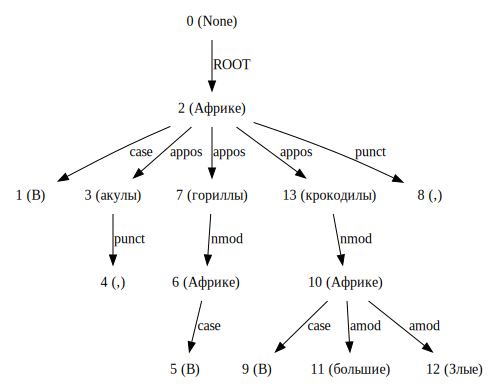

In [97]:
ud_graph = DependencyGraph(tree_str=ud[0])
ud_graph

In [98]:
ud_tree = ud_graph.tree()
print(ud_tree.pretty_print())

               Африке                   
  _______________|____________           
 |   |    |   гориллы     крокодилы     
 |   |    |      |            |          
 |   |  акулы  Африке       Африке      
 |   |    |      |      ______|______    
 В   ,    ,      В     В   большие  Злые

None


In [100]:
sent2 = 'В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы Будут вас кусать, Бить и обижать,- Не ходите, дети, В Африку гулять.'
print(sent2)

В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы Будут вас кусать, Бить и обижать,- Не ходите, дети, В Африку гулять.


In [101]:
parsed2 = pipeline.process(sent2)
# print(parsed2)

In [102]:
ud2 = conllu_to_list(parsed2) # превратили в лист
# print(ud2)

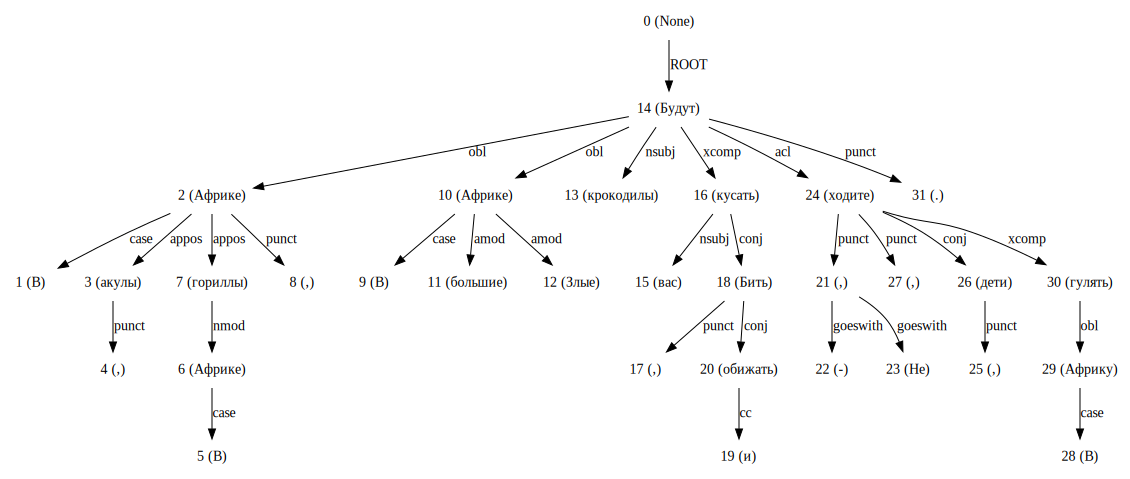

In [103]:
ud_graph2 = DependencyGraph(tree_str=ud2[0])
ud_graph2

In [104]:
ud_tree2 = ud_graph2.tree()
print(ud_tree2.pretty_print())

                                                   Будут                                                       
     ________________________________________________|_________________________________________                 
    |      |      Африке                      |              кусать                          ходите            
    |      |    ____|_____________            |            ____|_____              ____________|___________     
    |      |   |    |      |   гориллы        |           |         Бить          |       |          |   гулять
    |      |   |    |      |      |           |           |     _____|______      |       |          |     |    
    |      |   |    |    акулы  Африке      Африке        |    |         обижать  |       ,         дети Африку
    |      |   |    |      |      |      _____|______     |    |            |     |    ___|____      |     |    
крокодилы  .   В    ,      ,      В     В  большие  Злые вас   ,            и     ,   -        Не   